# HR Analytics - Predicting Employee Turnover

## Project Overview

The main goal of this project is to develop a machine learning model to predict whether an employee will leave the company. A successful model will identify reasons that drive employee turnover.

## Project Outline
1. [Project Background](#project_background)
2. [Objectives](#objectives)
3. [About The Dataset](#about_the_dataset)
4. [Importing Packages](#importing_packages)
5. [Preliminary Data Inspection](#preliminary_data_inspection)
6. [Data Cleaning](#data_cleaning)
7. [Exploratory Data Analysis](#exploratory_data_analysis)
8. [Statistical Testing](#statistical_testing)
9. [Machine Learning Model Development](#machine_learning_model_development)
10. [Conclusion](#conclusion)
11. [Appendix](#appendix)

## Project Background
<a id='project_background'></a>

A certain company is experiencing high employee turnover - employees leaving the company. As competent and productive employees are indispensable to business growth, companies invest a lot of resources into recruiting, interviewing, and training employees. 
To improve employee retention, the human resources department collected data about the employees and asked the data analytics team to better understand the data.


## Objectives
<a id='objectives'></
aThe goal of this project is to predict a machine learning model that predicts whether an employee will leave the company. A thorough analysis of the data and an accurate predictive model will answer the following research questions:
1. What types of employees leave the company?
2. Why do employees leave the company?
3. What variables have the most impact on employee turnover?
r?

## About The Dataset
<a id='about_the_dataset>
The dataset contains data of employees who worked for the company. The dataset is downloaded from 
d from [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)

The attributes in the dataset are defined in the table below.

| Variable | Description |
| -------- | ----------- |
| satisfaction_level | Employee-reported job satisfaction level [0&ndash;1] |
| last_evaluation | Score of employee's last performance review [0&ndash;1] |
| number_project | Number of projects employee contributes to |
| average_monthly_hours | Average number of hours employee worked per month |
| time_spend_company | How long the employee has been with the company (years) |
| Work_accident | Whether or not the employee experienced an accident while at work |
| left | Whether or not the employee left the company |
| promotion_last_5years | Whether or not the employee was promoted in the last 5 years |
| Department | The employee's department |
| salary | The employee's salary (U.S. dollars) |

## Import Packages
<a id='import_packages'></a>

In [1]:
# Import operational packages.
import pandas as pd
import numpy as np

# Import data visualization packages.
from matplotlib import pyplot as plt
import seaborn as sns
# Import packages for statistical testing.
from scipy import stats

# Import packages for machine learning model development.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
                            classification_report, ConfusionMatrixDisplay

# Import package to save model object.
import pickle

## Preliminary Data Inspection
<a id='preliminary_data_inspection'></a>

Load the dataset into a pandas DataFrame

In [2]:
df = pd.read_csv('./data/HR_comma_sep.csv')

Print first 10 rows of the data.

In [3]:
df.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

Get general information about the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Get summary statistics for each variable in the dataset.

In [5]:
df.describe(include='all')

satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique                   NaN                 NaN            NaN           NaN   
top                      NaN                 NaN            NaN           NaN   
freq                     NaN                 NaN            NaN           NaN   
mean              201.050337            3.498233       0.144610      0.238083   
std                49.943099            1.460136       0.351719      0.425924   
min                96.000000            2.000000       0.000000      0.000000   
25%               156.000000            3.000000       0.000000      0.000000   
50%               200.000000            3.000000       0.000000      0.000000   
75%               245.000000            4.000000       0.000000      0.000000   
max               310.000000           10.000000       1.000000      1.000000   

        promotion_last_5years Department salary  
count            14999.000000      14999  14999  
unique                    NaN         10      3  
top                       NaN      sales    low  
freq                      NaN       4140   7316  
mean                 0.021268        NaN    NaN  
std                  0.144281        NaN    NaN  
min                  0.000000        NaN    NaN  
25%                  0.000000        NaN    NaN  
50%                  0.000000        NaN    NaN  
75%                  0.000000        NaN    NaN  
max                  1.000000        NaN    NaN

### Results

* Format of column names are inconsistent. Column names need to be converted to `snake_case` in the data cleaning section.
* Some `int` variables (`Work_accident`, `left`, and `promotion_last_5years`) are binary-encoded categorical variables.

## Data Cleaning
<a id='data_cleaning'></a>

Rename columns for consistent formatting.

In [6]:
# Display column names.
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Create dictionary of columns to rename.
rename_columns = {'average_montly_hours': 'average_monthly_hours',
                  'time_spend_company': 'tenure_years',
                  'Work_accident': 'work_accident',
                  'Department': 'department'
                 }

# Rename columns.
df.rename(columns=rename_columns, inplace=True)

# Confirm column name change.
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure_years', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Check for missing data.

In [8]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure_years             0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Check for and remove duplicate data.

In [9]:
# Get number of duplicate rows.
df.duplicated().sum()

3008

In [10]:
# Drop duplicate rows and store cleaned data into a new DataFrame.
df_clean = df.drop_duplicates()

# Confirm thbat duplicates are removed.
df_clean.duplicated().sum()

0

### Results

* 3008 rows of duplicate data are removed from the dataset.

## Exploratory Data Analysis
<a id='exploratory_data_analysis'></a>

Check class balance of Left/Stayed.

In [11]:
# Create `left_label` column with 0 as `stayed` and 1 as `left` for readability.
df_clean.loc[:, 'left_label'] = df_clean['left'].map({0: 'Stayed', 1: 'Left'})
df_clean['left_label']

C:\Users\Personal\AppData\Local\Temp\ipykernel_8412\2258422256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'left_label'] = df_clean['left'].map({0: 'Stayed', 1: 'Left'})


0          Left
1          Left
2          Left
3          Left
4          Left
          ...  
11995    Stayed
11996    Stayed
11997    Stayed
11998    Stayed
11999    Stayed
Name: left_label, Length: 11991, dtype: object

In [12]:
print('Counts of employees who left or stayed')
print(df_clean['left_label'].value_counts())
print('\n')
print('Percentage of employees who left or stayed')
print(df_clean['left_label'].value_counts(normalize=True))

Counts of employees who left or stayed
left_label
Stayed    10000
Left       1991
Name: count, dtype: int64


Percentage of employees who left or stayed
left_label
Stayed    0.833959
Left      0.166041
Name: proportion, dtype: float64


### Outliers

Create box plots to visualize presence of outliers in numeric variables.

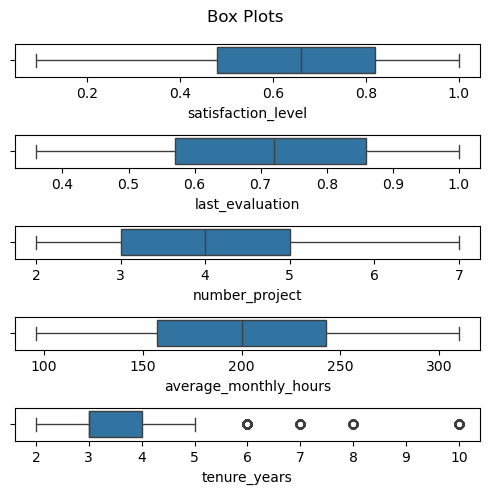

In [13]:
# Create list of columns to make box plots.
columns_to_plot = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure_years']

# Create subplots
fig, axs = plt.subplots(5, figsize=(5,5))

# Create box plots.
for i, col in enumerate(columns_to_plot):
    sns.boxplot(df_clean, x=col, ax=axs[i])

plt.suptitle('Box Plots')

# Show plot.
plt.tight_layout()
plt.show()

Outliers are present in `tenure_years`. Determmine number of outliers in `tenure_years`.

In [14]:
def get_limits(data: pd.Series):
    """
    This function reads a pandas Series and returns the lower and upper limit based on
    the interquartile range.
    """
    # Get first and thirs quartiles
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    # Calculate interquartile range.
    iqr = q3 - q1
    # Calculate lower and upper limit
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    
    return lower_limit, upper_limit

def is_outlier(data: pd.Series):
    """
    This function reads a pandas Series and returns a boolean mask of whether outliers are assigned True.
    """
    # Get lower and upper limits.
    lower_limit, upper_limit = get_limits(data)
    # Create boolean mask using lower and upper limit
    outlier_mask = (data < lower_limit) | (data > upper_limit)
    return outlier_mask

In [15]:
# Determine the number of outliers for `tenure_years`.
lower_limit, upper_limit = get_limits(df_clean['tenure_years'])
num_outliers = is_outlier(df_clean['tenure_years']).sum()
print(f'Lower limit: {lower_limit}')
print(f'Upper limit: {upper_limit}')
print(f'Number of outliers: {num_outliers}')

Lower limit: 1.5
Upper limit: 5.5
Number of outliers: 824


### Turnover by Department

Visualizing the proportion of employees who left the company by department will determine whether specific department(s) experience unusually high turnover rates.



In [16]:
# Calculate overall turnover rate.
overall_turnover_rate = df_clean['left_label'].value_counts(normalize=True).iloc[1]

# Calculate turnover rate by department.
left_label_by_dep = df_clean.groupby('department')['left_label'].value_counts(normalize=True).unstack('left_label')
left_label_by_dep.sort_values('Left', ascending=False, inplace=True)  # Sort by descenging turnover rate
turnover_by_dep = left_label_by_dep['Left']

In [17]:
# Create variable to set the hue order by `left_label`.
label_order = ['Stayed', 'Left']

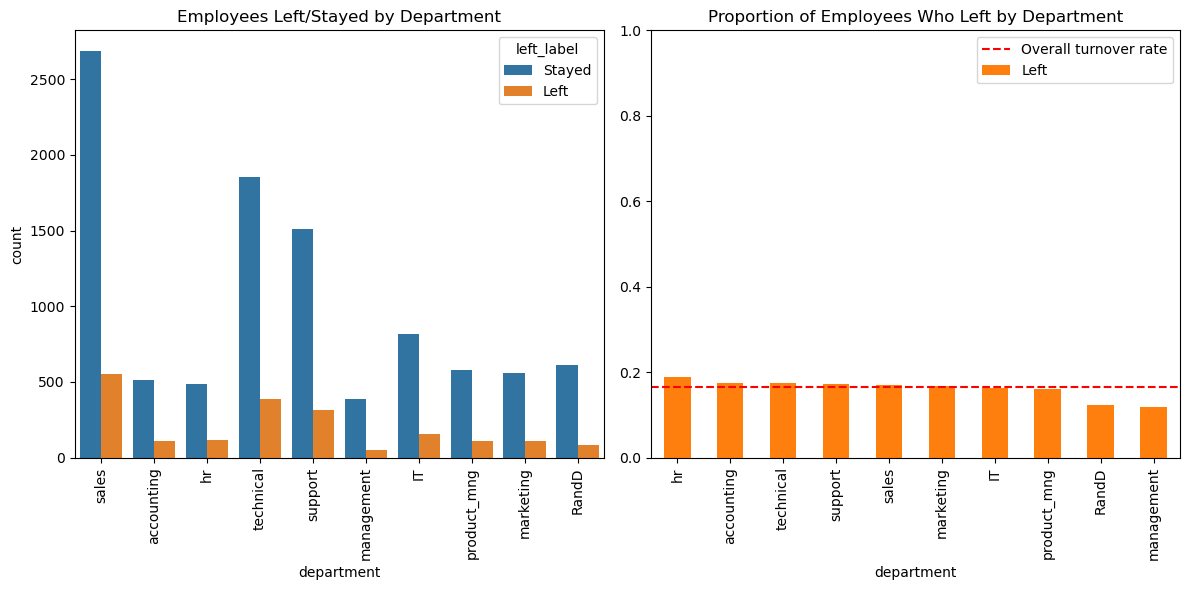

In [18]:
# Create 2 subplots.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create bar chart to compare turnover by derpartment.
sns.countplot(df_clean, x='department', hue='left_label', hue_order=label_order, ax=ax1)
ax1.set_title('Employees Left/Stayed by Department')
ax1.xaxis.set_tick_params(rotation=90)

# Create bar chart to compare turnover rate by department.
turnover_by_dep.plot.bar(color=sns.color_palette().as_hex()[1], ax=ax2)
ax2.axhline(overall_turnover_rate, label='Overall turnover rate', color='red', linestyle='--')
ax2.set_title('Proportion of Employees Who Left by Department')
ax2.xaxis.set_tick_params(rotation=90)
ax2.set_ylim(0, 1.0)
ax2.legend(labels=['Overall turnover rate', 'Left'])

# Show plot.
plt.tight_layout()
plt.show()

Turnover rate across departments look normal. Employees leaving does not appear to be associated with a specific department. This insight can be conbfirmed by statistical testing in a later section.

### Turnover by Work Accident

Work accidents is a possible reason for employees to leave, so it is necessary to determine the proportion of employees who left that have experienced a work accident.

In [19]:
# Calculate proportions of employees who left or stayed grouped by whether an employee has experie3nced a work accident.
df_clean.groupby('work_accident')['left_label'].value_counts(normalize=True).unstack('left_label')

left_label         Left    Stayed
work_accident                    
0              0.185978  0.814022
1              0.056757  0.943243

Surprisingly, only 5.7% of employees who experienced a work accident left the company while 18.6% of employees who have not expeerience a work accident left the company. Note that there is no provided data on whether the accident caused the employee to leave.

Next, visualize work accident rates by department to determine whether specific department(s) are more prone to work accidents.

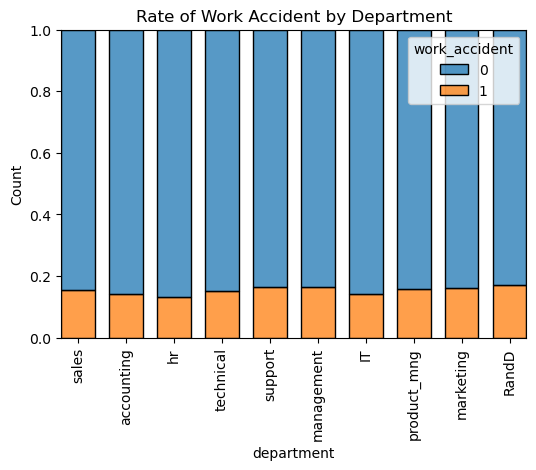

In [20]:
# Create 100% stacked bar chart to visualize proportion of employees who had a work accident by department.
plt.figure(figsize=(6, 4))
sns.histplot(df_clean, x='department', hue='work_accident', multiple='fill', shrink=0.7)
plt.title('Rate of Work Accident by Department')
plt.xticks(rotation=90)
plt.show()

Since turnover and work accident rates are similar across departments, these variables are unlikely reasons driving employee turnover. There is no need to explore distribution of variables within specific departments.

### Turnover by Satisfaction, Last Evaluation Score, and Work Load
There are two ways that an employee leaves a company:
1. **Quitting** - The most probable reasons for employees to leave are low job `satisfaction_level` and/or too much workload.
2. **Getting fired** - These employees probably have unsatisfactory performance which will be identified by low `last_evaluation` scores.

#### Satisfaction Level

Compare the mean and median satisfaction levels between employees who left or stayed.

In [21]:
df_clean.groupby('left_label')['satisfaction_level'].agg(func=['mean', 'median'])

mean  median
left_label                  
Left        0.440271    0.41
Stayed      0.667365    0.69

Unsurprisingly, the mean and median satisfaction levels of employees who left are ower than those who stayed.

Next, compare the distribution of satisfaction levels between employees who left or stayed.

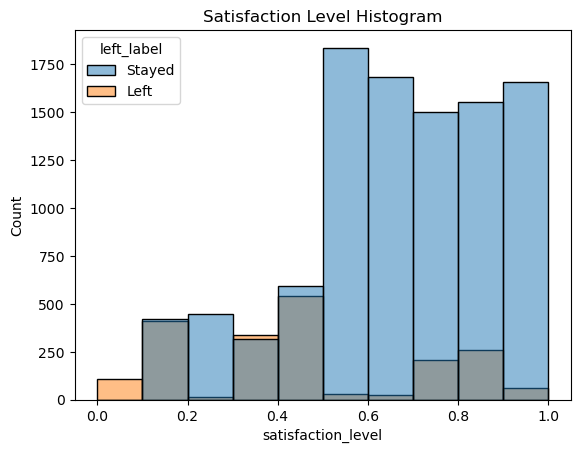

In [22]:
sns.histplot(df_clean, x='satisfaction_level', hue='left_label', hue_order=label_order, 
             bins=10, binrange=(0, 1.0)
            )
plt.title('Satisfaction Level Histogram')
plt.show()

**NOTE:**

There appears to be three types of employees who left based on satisfaction levels: very low, slightly low, and high.

Next, visualize the relationship between satisfaction levels and other variables to further characterize these three groups.

#### Satisfaction by Average Monthly Hours

Too much workload is a likely reason for job dissatisfaction. Visualizing the relationship between average monthly hours and job dissatisfaction provides useful information on differences in employee behavior among the three groups observed earlier.

A useful reference for working hours is the normal working hours of a regular full-time employee. A regular full-time job has 8 working hours per day from Monday to Friday, having a total of 40 hours per week. Assuming 50 working weeks in a  year, the normal monthly working hours of a regular full-time job is 

`50 weeks` x `40 hours` / `12 months` = `166.7 hours`.

Employees with `average _monthly_hours` well over 166.7 are potentially overworked.

In [23]:
# Set variable for normal monthly hours of a regular full-time employee.
normal_monthly_hours = 166.7

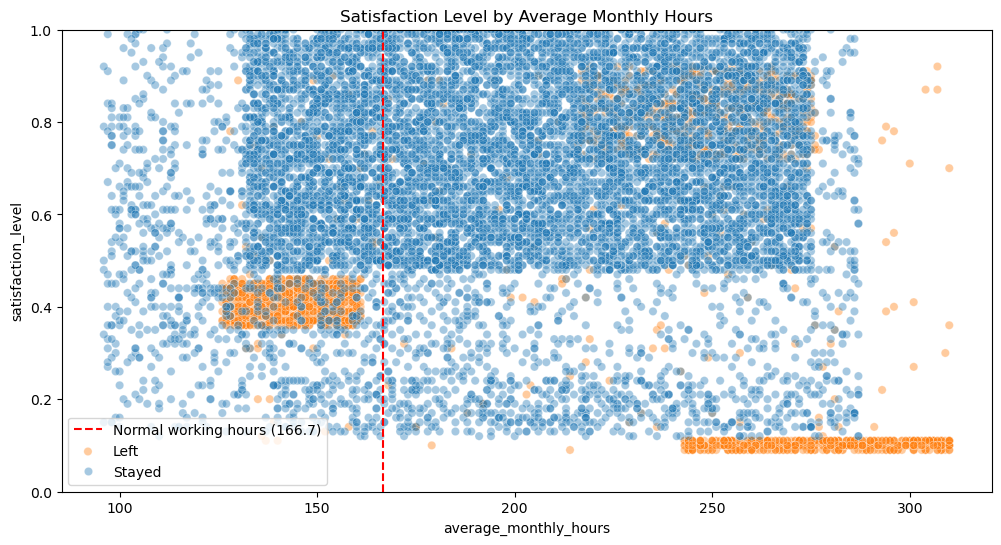

In [24]:
# Create scatter plot of `satisfaction_level` by `average_monthly_hours`.
plt.figure(figsize=(12, 6))
plt.axvline(normal_monthly_hours, label='Normal working hours (166.7)',  color='red', linestyle='--')
sns.scatterplot(df_clean, x='average_monthly_hours', y='satisfaction_level', hue='left_label', hue_order=['Stayed', 'Left'], 
                alpha=0.4
               )
plt.title('Satisfaction Level by Average Monthly Hours')
plt.ylim(0, 1.0)
plt.legend(labels=['Normal working hours (166.7)', 'Left', 'Stayed'])
plt.show()

There are two groups of employees based on average monthly hours:
1. Group A: A group of employees who left having average monthly hours less than a normal full-time job are the same employees that have slightly low satisfaction level. These employees may be given less workload hence the lower working hours.
2. Group B: A group of employees who left having very high average monthly hours are divided into two subgroups based on their satisfaction level: very high and very low. These employees are overworked. This explains the very low satisfaction level of a subgroup of employees, but not the ones with high satisfaction level.

It can also be seen in the scatter plot that majority of the employees are overworked regardless of whether they left or stayed, which is concerning.

#### Average Monthly Hours by Number of Projects

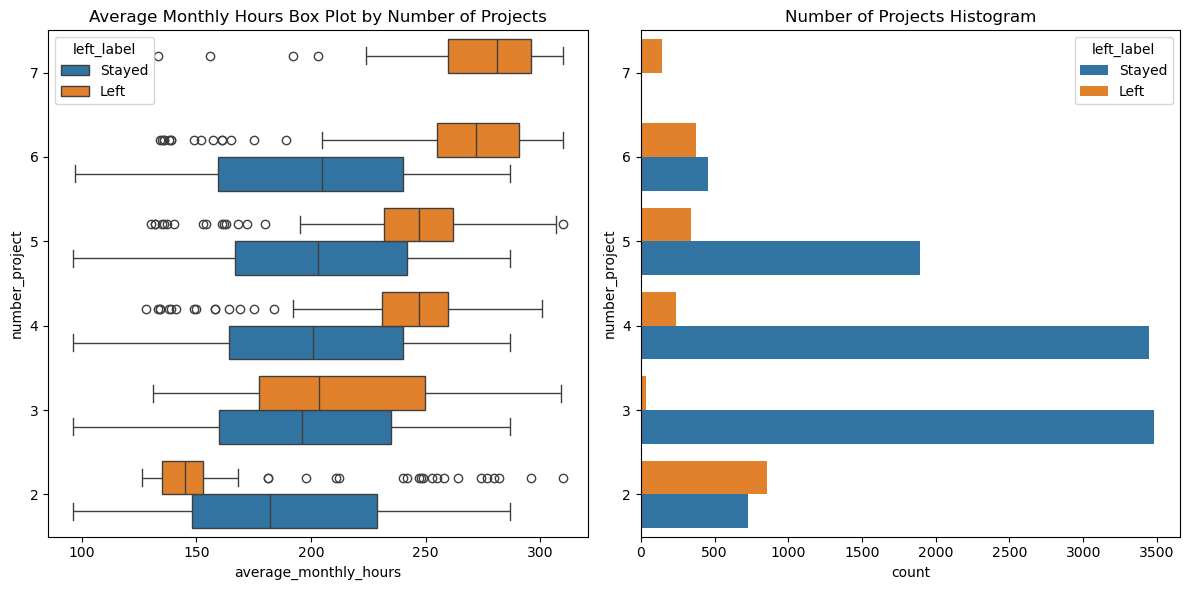

In [25]:
# Create 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create box plot of `aveerage_monthly_hours` by `number_project` and `left`.
sns.boxplot(df_clean, x='average_monthly_hours', y='number_project', hue='left_label', hue_order=['Stayed', 'Left'], 
            orient='h', ax=ax1
           )
ax1.set_title('Average Monthly Hours Box Plot by Number of Projects')
ax1.invert_yaxis()

# Create count plot of `number_of_projects` by `left`.
sns.countplot(df_clean, y='number_project', hue='left_label', hue_order=['Stayed', 'Left'], orient='h', ax=ax2)
ax2.set_title('Number of Projects Histogram')
ax2.invert_yaxis()

# Show plot
plt.tight_layout()
plt.show()

Distribution of average monthly hours of employees who stayed is similar across number of projects. On the other hand, average monthly hours of employees who left seems to increase as number of projects increase. An exception is that of employees who left with low average monthly hours and only 2 projects.

Employees who left seem to cluster into two groups:
1. Lower average monthly hours than employees who stayed and had 2 projects: These employees were probably fired. It is possible that they were given a notice and were given less workload, but this speculation needs to be confirmed. This group has similar average monthly hours range as "Group A"" identified in the earlier chart.
2. Group B - Higher average monthly hours than employees who stayed and had 4 or more projects: These employees probably have too much workload and contributed the most to projects. These employees might hve quitted their job due to burnout. Their median averafe monthly hours values are consistent with "Group B" identified in the earlier chart.

Also note that all employees who had to handle 7 projects left the company, further supporting the hypothesis of employee burnout.

Finally, there seems to be a low turnover rate among employees who contributed to 3 aor 4 projects, implying that this range is possibly the optimal number of projects to promote employee retention.

#### Last Evaluation Score by Average Monthly Hours

Plot `last_evaluation` by `average_monthly_hours` to visualize job performance of the previously identified two clusters of employees who left.

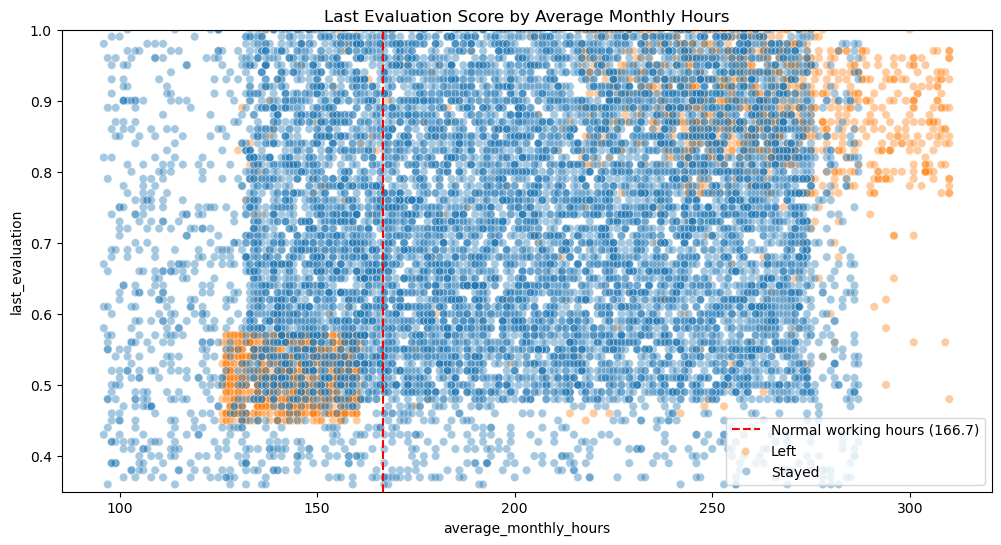

In [26]:
# Create scatter plot of `last_evaluation` by `average_monthly_hours`
plt.figure(figsize=(12, 6))
plt.axvline(normal_monthly_hours, label='Normal working hours (166.7)',  color='red', linestyle='--')
sns.scatterplot(df_clean, x='average_monthly_hours', y='last_evaluation', hue='left_label', hue_order=['Stayed', 'Left'], 
                alpha=0.4
               )
plt.title('Last Evaluation Score by Average Monthly Hours')
plt.ylim(0.35, 1.0)
plt.legend(labels=['Normal working hours (166.7)', 'Left', 'Stayed'])
plt.show()

There are two groups of employees who left with average monthly hours consistent to earlier analyses:
1. Group A: These employees work less hours and were given average evaluation scores. These employees are probably not performing very well in their job.
2. Group B: These employees work long hours and have high evaluation scores. These employees are the same ones who contribute to the most projects.

There distribution of data points on the plot roughly resembles some linear relationship. This can be confirmed by calculating pearson correlation coefficient r later.

There is an emerging pattern of employees who left being grouped into two distinct clusters with distinct characteristics. The observed employee behavior are summarized below:
| Cluster | Working Hours | Number of Projects | Last Eval. Score | Satisfaction |
| ------- | ------------- | ------------------ | ---------------- | ------------ |
| A | similar to regular full-time job | 2 | average (~0.5) | mildly dissatisfied ~0.4 |
| B | very high (over ~240) | >= 4 | high (over ~0.8) | very low (~0) |

Employees in Cluster A are likely fired for their unsatisfactory performance which may be associated with their low working hours. On the other hand, employees in Cluster B likely left their job due to burnout as suggested by their low satisfaction levels. These employees are the ones who worked the longest hours and contributed the most to projects. Take note that there are some employees with similar work behavior as Cluster B but has high reported satisfaction levels.

#### Promotion Last 5 Years

In [211]:
# Calculate rate of promotion
df_clean['promotion_last_5years'].sum() / df_clean.shape[0]

0.016929363689433742

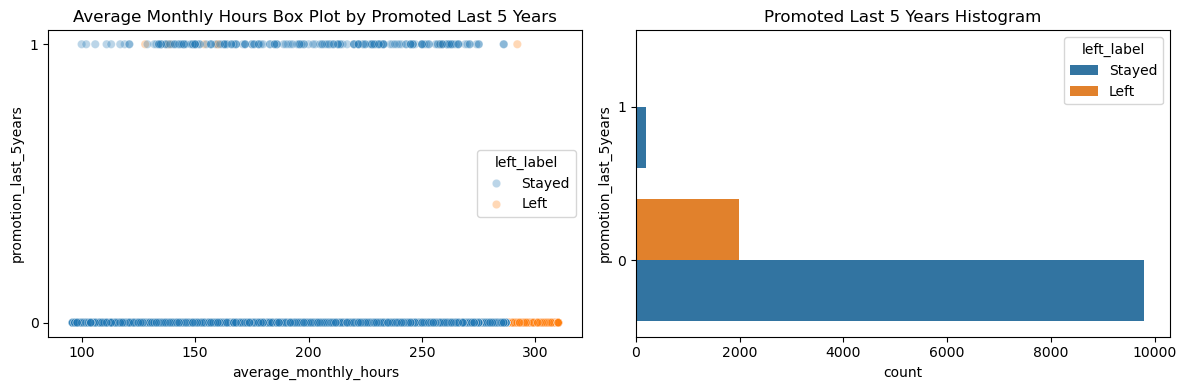

In [27]:
# Create 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Create box plot of `aveerage_monthly_hours` by `promotion_last_5years` and `left`.
sns.scatterplot(df_clean, x='average_monthly_hours', y='promotion_last_5years', hue='left_label', hue_order=['Stayed', 'Left'], 
            alpha=0.3, ax=ax1
           )
ax1.set_title('Average Monthly Hours Box Plot by Promoted Last 5 Years')
ax1.set_yticks((0, 1))

# Create count plot of `promotion_last_5years` by `left`.
sns.countplot(df_clean, y='promotion_last_5years', hue='left_label', hue_order=['Stayed', 'Left'], 
              orient='h', ax=ax2
             )
ax2.set_title('Promoted Last 5 Years Histogram')
ax2.invert_yaxis()

# Show plot
plt.tight_layout()
plt.show()

There are two important observations from the two cahrts.
1. Very few employees got promoted.
2. Almost all employees who worked the longest hours were not promoted.

A very low rate of promotion impacts the likelihood of an employee leaving. This probably has a significant impact to employees working the longest hours, as they contribute the most to projects but are not getting the promotion they deserve.

### Turnover by Tenure

Compare the distribution and proportion of tenure between employees who left/stayed.

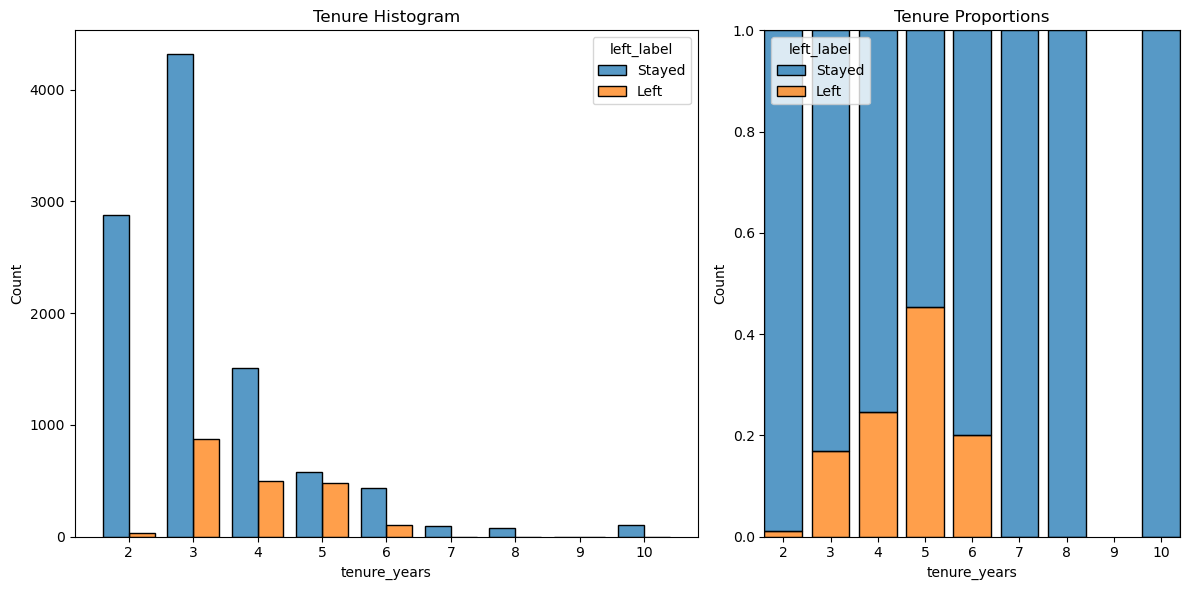

In [28]:
# Create 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), gridspec_kw={'width_ratios': (3, 2)})

# Create histogram of `tenure_years`
sns.histplot(df_clean, x='tenure_years', hue='left_label', hue_order=label_order, 
             multiple='dodge', shrink=0.8, discrete=1, bins=9, binrange=(2, 10), ax=ax1
            )
ax1.set_title('Tenure Histogram')
ax1.set_xticks(range(2, 11))

# Create 100% stacked bar chart of `tenure_years` by `left`
sns.histplot(df_clean, x='tenure_years', hue='left_label', hue_order=label_order, 
             multiple='fill', shrink=0.8, discrete=1, bins=9, binrange=(2, 10), ax=ax2
            )
ax2.set_title('Tenure Proportions')
ax2.set_xticks(range(2, 11))

# Show plot
plt.tight_layout()
plt.show()

Based on counts, 3 years is the tenure with the highest number of employees who left, but the highest turnover rate is 5 years; moreover, none of the employees with tenure of at least 7 years left. Perhaps long-tenured employees represent higher positions in the company.

Next, compare salary ranges between short-tenured (less than 7 years) and long-tenured (7 or more) employees.

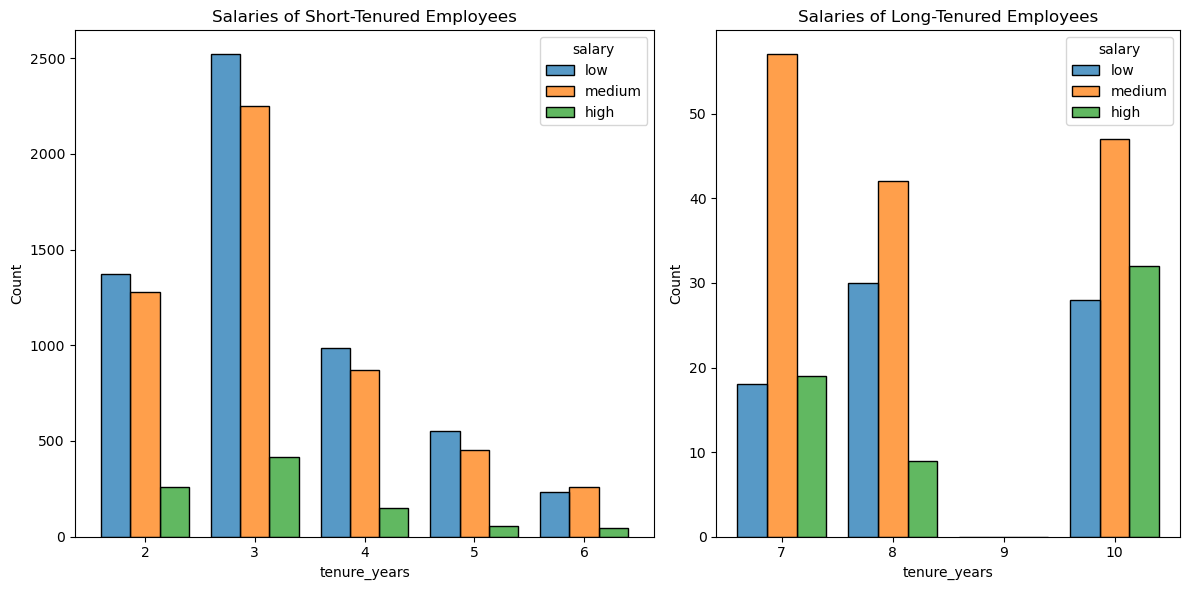

In [29]:
# Create 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': (5, 4)})

# Create counts of `tenure_years` by `salary` of employees with tenure_years < 7
short_tenure = df_clean[df_clean['tenure_years']<7]
sns.histplot(short_tenure, x='tenure_years', hue='salary', hue_order=['low', 'medium', 'high'], 
             multiple='dodge', shrink=0.8, discrete=1, bins=4, binrange=(2, 6), ax=ax1)
ax1.set_title('Salaries of Short-Tenured Employees')
ax2.set_xticks(range(2, 7))

# Create counts of `tenure_years` by `salary` of employees with tenure_years > 7
long_tenure = df_clean[df_clean['tenure_years']>=7]
sns.histplot(long_tenure, x='tenure_years', hue='salary', hue_order=['low', 'medium', 'high'], 
             multiple='dodge', shrink=0.8, discrete=1, bins=4, binrange=(7, 10), ax=ax2)
ax2.set_title('Salaries of Long-Tenured Employees')
ax2.set_xticks(range(7, 11))

# Show plot
plt.tight_layout()
plt.show()

There's nothing unusual in the distributions of salary among short and long tenures.

Next, compare rates of promotion by tenure.

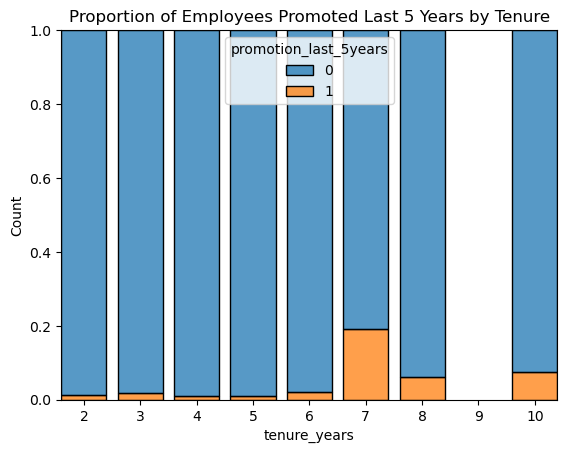

In [30]:
sns.histplot(df_clean, x='tenure_years', hue='promotion_last_5years',
             multiple='fill', shrink=0.8, discrete=1, bins=9, binrange=(2, 10)
            )
plt.title('Proportion of Employees Promoted Last 5 Years by Tenure')
plt.xticks(range(2, 11))
plt.show()

There is a higher percentage of long-tenured employees who got promoted compared to short-tenured employees. The following insights can be drawn from this observation:
1. Employees who got promoted are more likely to stay, which is expected.
2. Since a higher proportion of long-tenured employees received promotion within the last 5 years than short-tenured employees, these employees are likely to have higher positions in the company.

Compare satisfaction levels by tenure.
<a id='satisfaction_by_tenure'></a>

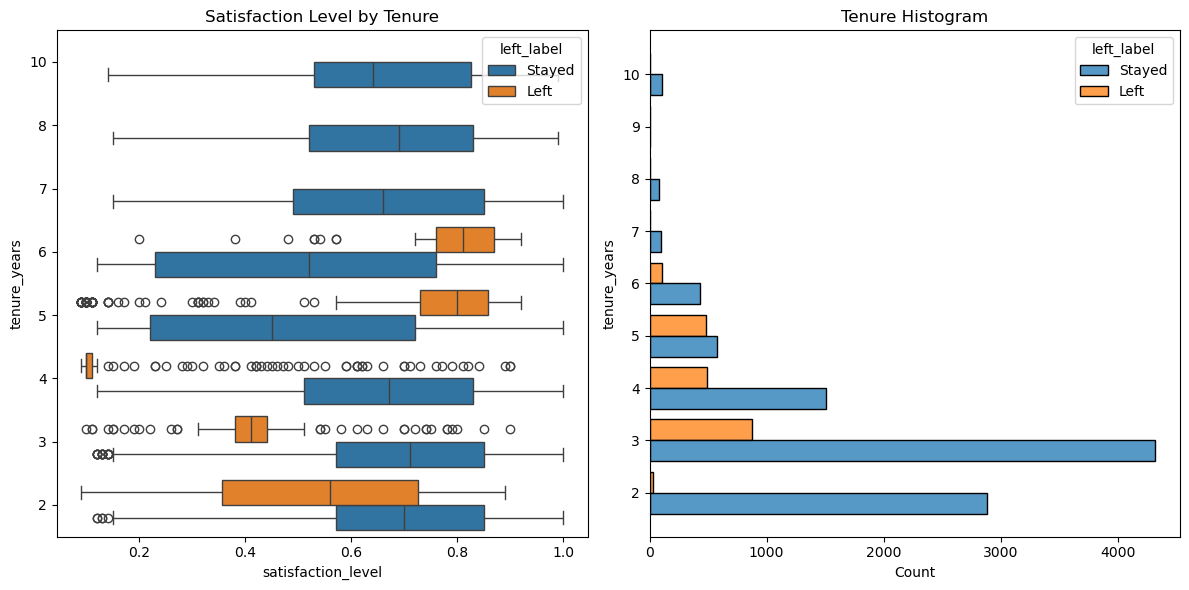

In [31]:
# Create 2 subplots.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create box plot of `satisfaction_level` by `tenure_years` and `left_label`
sns.boxplot(df_clean, x='satisfaction_level', y='tenure_years', hue='left_label', hue_order=label_order,
            orient='h', ax=ax1
           )
ax1.set_title('Satisfaction Level by Tenure')
ax1.invert_yaxis()

# Create histogram of `tenure_years` by `left_label`.
sns.histplot(df_clean, y='tenure_years', hue='left_label', hue_order=label_order, 
             multiple='dodge', shrink=0.8, discrete=1, bins=9, binrange=(2, 10), ax=ax2
            )
ax2.set_title('Tenure Histogram')
ax2.set_yticks(range(2, 11))

# Show plot.
plt.tight_layout()
plt.show()

Four-year tenured employees weho left have abnormally low satisfaction levels. For now, there is no available data to further investigate the cause of dissatisfaction among this specific group of employees. This should be accounted for in the company's future investigations.

### Correlation Matrix

Finally, create a correlation heatmap to visualize correlation between variables.

In [32]:
# Create correlation matrix
df_corr = df_clean.corr(numeric_only=True)

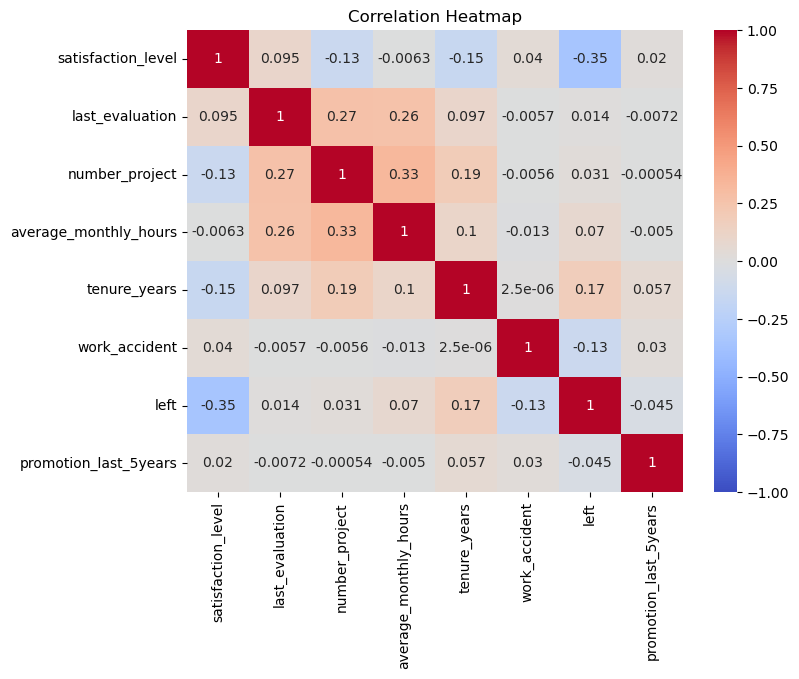

In [33]:
# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, vmin=-1.0, vmax=1.0, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap confirms that last evaluation score has some positive correlation with average monthly hours and number of projects. There is also some negative correlation between satisfaction level and leaving the company.

### Resaults

All observations suggest burnout as a major driver of employee turnover. Employees leaving the company is associated with job dissatisfaction and very long working hours. The best performing employees did not receive promotion despite having the longest working hours and very high evaluation scores.

## Statistical Testing
<a id='statistical_testing'></a>

Earlier EDA show that turnover rate is similar across departments. A chi-square goodness of fit test will confirm if the observed small differences in turnover rates are statisftically significant. Assuming there is no significant difference in turnover rates across departments, the expected proportion of employees who left by department will be equal.

The nu;l and alternative hypotheses are:
* Null hypothesis: There is no significant difference between the observed turnover rate - the proportion of employees who left, and expected.
* Alternative hypothesis - there is a signifcant different between observed adn expected turnover rates by department.

The test will be done with a signifcance level of 0.05.

In [34]:
# Set signifcance level.
significance_level = 0.05

In [35]:
# Count employees who left by department.
observed_values = df_clean[df_clean['left']==1]['department'].value_counts().reset_index()

# Calculate overall turnover rate.
overall_turnover_rate = df_clean['left'].sum() / df_clean.shape[0]
# Get value counts by department.
count_by_dep = df_clean['department'].value_counts()
expected_values = np.round(count_by_dep * overall_turnover_rate).astype(np.int64).reset_index()

# Create DataFrame for chi2 test.
chi2_data = pd.merge(observed_values, expected_values, on='department')
chi2_data.columns = ['department', 'observed', 'expected']
chi2_data

chi2, pvalue = stats.chisquare(chi2_data['observed'], chi2_data['expected'])

print(f'p-value ({pvalue:.3f} >= significance level {significance_level} is {pvalue>=significance_level}')

p-value (0.048 >= significance level 0.05 is False


The calcukated p-value (0.048) is less than the significance level 0.05, therefore we fail to rject the null hypothesis: There is no significant difference in turnover rates among departments.

## Machine Learning Model Development
<a id='machine_learning_model_development'></a>

### Feature Engineering

Drop `left_label` column since it is no longer needed.

In [36]:
df_model = df_clean.copy().drop('left_label', axis=1)
df_model.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure_years  work_accident  left  promotion_last_5years department  salary  
0             3              0     1                      0      sales     low  
1             6              0     1                      0      sales  medium  
2             4              0     1                      0      sales  medium  
3             5              0     1                      0      sales     low  
4             3              0     1                      0      sales     low

#### Feature Selection

While `satsifaction_level` may be a strong predictor of employee turnover, it will likely not be available upon deployment of the machine learning model.

In [37]:
df_model.drop('satisfaction_level', axis=1, inplace=True)
df_model.head()

last_evaluation  number_project  average_monthly_hours  tenure_years  \
0             0.53               2                    157             3   
1             0.86               5                    262             6   
2             0.88               7                    272             4   
3             0.87               5                    223             5   
4             0.52               2                    159             3   

   work_accident  left  promotion_last_5years department  salary  
0              0     1                      0      sales     low  
1              0     1                      0      sales  medium  
2              0     1                      0      sales  medium  
3              0     1                      0      sales     low  
4              0     1                      0      sales     low

#### Feature Transformation

Since the categorical variable `salary` has ordinal values, it can be converted to numeric by label encoding.

In [38]:
df_model['salary'] = (df_model['salary'].astype('category')
       .cat.set_categories(['low', 'medium', 'high'])
       .cat.codes
      )
df_model.head()

last_evaluation  number_project  average_monthly_hours  tenure_years  \
0             0.53               2                    157             3   
1             0.86               5                    262             6   
2             0.88               7                    272             4   
3             0.87               5                    223             5   
4             0.52               2                    159             3   

   work_accident  left  promotion_last_5years department  salary  
0              0     1                      0      sales       0  
1              0     1                      0      sales       1  
2              0     1                      0      sales       1  
3              0     1                      0      sales       0  
4              0     1                      0      sales       0

Convert categorical variables to numerical by one-hot encoding.

In [39]:
df_model = pd.get_dummies(df_model, drop_first=True, columns=['department'])
df_model.head()

last_evaluation  number_project  average_monthly_hours  tenure_years  \
0             0.53               2                    157             3   
1             0.86               5                    262             6   
2             0.88               7                    272             4   
3             0.87               5                    223             5   
4             0.52               2                    159             3   

   work_accident  left  promotion_last_5years  salary  department_RandD  \
0              0     1                      0       0             False   
1              0     1                      0       1             False   
2              0     1                      0       1             False   
3              0     1                      0       0             False   
4              0     1                      0       0             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  
0               False                 False  
1               False                 False  
2               False                 False  
3               False                 False  
4               False                 False

#### Feature Extraction

In earlier EDA, it ws hypothesized that there are two main groups of employees who left - those who were likely fired (low `average_monthly_hours` and `last_evaluation`) and those who quit their job due to being overworked (high `average_monthly_hours` and `last_evaluation`). The `average_monthly_hours` of the first group are likely set by the management to be lower as they were already identified to be fired, so there is no point in predicting if these employees will leave or not. 

Instead, the focus of the prediction should be on the ones that will quit their job, which is associated with being overworked. From the reference normal working hours defined earlier, we can set a cut-off value to classify if an employee is overworked or not. An employee can be considered overworked if they have to work overtime for at least an hour and at least half of their working days. On average, that will be

`(9 hours)*(2.5 ays)` + `(8 hours)*(2.5 days)` = `42.5 hours per week`

This converts to an `average_monthly_hours` value of

`42.5 hours/week` * `50 weeks` / `12 months` = `177.08 hours`

Create a new feature `overworked` that is `True` for employees with `average_monthly_hours` of at least 177.08 hours.

In [40]:
df_model['overworked'] = df_model['average_monthly_hours'] >= 177.08
df_model.head()

last_evaluation  number_project  average_monthly_hours  tenure_years  \
0             0.53               2                    157             3   
1             0.86               5                    262             6   
2             0.88               7                    272             4   
3             0.87               5                    223             5   
4             0.52               2                    159             3   

   work_accident  left  promotion_last_5years  salary  department_RandD  \
0              0     1                      0       0             False   
1              0     1                      0       1             False   
2              0     1                      0       1             False   
3              0     1                      0       0             False   
4              0     1                      0       0             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False       False  
1               False                 False        True  
2               False                 False        True  
3               False                 False        True  
4               False                 False       False

The `overworked` variable will be used instead of `average_monthly_hours` as a measure of working hours.

In [41]:
df_model.drop('average_monthly_hours', axis=1, inplace=True)
df_model.head()

last_evaluation  number_project  tenure_years  work_accident  left  \
0             0.53               2             3              0     1   
1             0.86               5             6              0     1   
2             0.88               7             4              0     1   
3             0.87               5             5              0     1   
4             0.52               2             3              0     1   

   promotion_last_5years  salary  department_RandD  department_accounting  \
0                      0       0             False                  False   
1                      0       1             False                  False   
2                      0       1             False                  False   
3                      0       0             False                  False   
4                      0       0             False                  False   

   department_hr  department_management  department_marketing  \
0          False                  False                 False   
1          False                  False                 False   
2          False                  False                 False   
3          False                  False                 False   
4          False                  False                 False   

   department_product_mng  department_sales  department_support  \
0                   False              True               False   
1                   False              True               False   
2                   False              True               False   
3                   False              True               False   
4                   False              True               False   

   department_technical  overworked  
0                 False       False  
1                 False        True  
2                 False        True  
3                 False        True  
4                 False       False

### Split Data for Model Building, Validation, and Final Evaluation

Set feature and target variables.

In [42]:
x = df_model.drop('left', axis=1)
y = df_model['left']

Split data into training, validation, and test sets with 60/20/20 ratio.

In [43]:
x_tv, x_test, y_tv, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [44]:
x_train, x_val, y_train, y_val = train_test_split(x_tv, y_tv, stratify=y_tv, test_size=0.25, random_state=42)

### Model Building

#### Decision Tree

Create decision tree object instance.

In [45]:
dtree = DecisionTreeClassifier(random_state=42)

Set parameters for hyperparameter tuning.

In [46]:
dtree_cv_params = {'max_depth': [2, 4, 6, 8, 10, 12, None],
                   'min_samples_split': [2, 4, 6, 8, 10],
                   'min_samples_leaf': [1, 2, 4, 6, 8, 10]
                  }
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

Create `GridSearchCV`instance for decision tree.

In [47]:
dtree_cv = GridSearchCV(estimator=dtree, 
                       param_grid=dtree_cv_params, 
                       scoring=scoring, 
                       cv=5, 
                       refit='roc_auc', 
                       n_jobs=-1)

Train model.

In [48]:
%%time
# Uncomment to train model.
#dtree_cv.fit(x_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


Create function to save or load model.

In [49]:
def save_model(model_object, file_name: str):
    """
    This function writes a machine learning model model_object into a .pickle file.
    """
    with open(f'{file_name}.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

def load_model(file_name: str):
    """
    This function reads a .pickle file and returns a machine learning model object.
    """
    with open(f'{file_name}.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
        return model

Save or load decision tree model.

In [50]:
# Uncommen to save model to a .pickle file.
#save_model(dtree_cv, 'dtree_cv')

In [51]:
# Uncomment to load model from .pickle file.
dtree_cv = load_model('dtree_cv')

Get score and parameters of the best estimator.

In [52]:
dtree_cv.best_score_

0.956707901924314

In [53]:
dtree_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 8}

#### Random Forest

Create random forest object instance.

In [54]:
rf = RandomForestClassifier(random_state=42)

Set parameters for hyperparameter tuning.

In [55]:
rf_cv_params = {'max_depth': [6, 7, 8, None],
                'max_features': [0.4, 0.5, 0.6, 0.7],
                'max_samples': [0.4, 0.6, 0.8, 1.0],
                'min_samples_split': [2, 4],
                'min_samples_leaf': [1, 2],
                'n_estimators': [300, 500]
               }
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

Create `GridSearchCV` instance for random forest model.

In [56]:
rf_cv = GridSearchCV(estimator=rf, 
                     param_grid=rf_cv_params, 
                     scoring=scoring, 
                     cv=5, 
                     refit='roc_auc', 
                     n_jobs=-1)

Train model.

In [57]:
%%time
# Uncomment to train random forest model.
#rf_cv.fit(x_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


Save or load random forest model.

In [58]:
# Uncomment to save model to .pickle file.
#save_model(rf_cv, 'rf_cv')

In [59]:
# Uncomment to load model from .pickle file
rf_cv = load_model('rf_cv')

Get score and parameters of the best estimator.

In [60]:
rf_cv.best_score_

0.9695564827384049

In [61]:
rf_cv.best_params_

{'max_depth': 7,
 'max_features': 0.4,
 'max_samples': 0.6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

#### XGBoost

Create XGBoost classifier object instance.

In [62]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

Set parameters for hyperparameter tuning.

In [63]:
xgb_cv_params = {'max_depth': [4, 6, 8, 10, 12, None],
                'min_child_weight': [1, 2, 4, 6, 8, 10],
                 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                'n_estimators': [50, 100, 200, 300, 500]
               }
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

Create `GridSearchCV` instance for XGBoost classifier.

In [64]:
xgb_cv = GridSearchCV(estimator=xgb,
                      param_grid=xgb_cv_params,
                      scoring=scoring,
                      cv=5,
                      refit='roc_auc',
                      n_jobs=-1
                     )

Train model.

In [65]:
%%time
# Uncomment to train model.
#xgb_cv.fit(x_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


Save or load model.

In [66]:
# Uncomment to save model.
#save_model(xgb_cv, 'xgb_cv')

In [67]:
# Uncomment to load model.
xgb_cv = load_model('xgb_cv')

Get score and parameters of the best estimator.

In [68]:
xgb_cv.best_score_

0.9723049417634175

In [69]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 6,
 'n_estimators': 50}

### Model Validation

Create function to get evaluation metrics from model predictions. 

In [70]:
def get_test_scores(model_name: str, y_true, y_pred):
    """
    This function calculates performance metrics and compiles them into a DataFrame.
    """
    table = pd.DataFrame({'model': [model_name],
                          'accuracy': [accuracy_score(y_true, y_pred)],
                          'precision': [precision_score(y_true, y_pred)],
                          'recall': [recall_score(y_true, y_pred)],
                          'f1': [f1_score(y_true, y_pred)],
                          'roc_auc': [roc_auc_score(y_true, y_pred)]
                         }
                        )
    return table

Create function to plot confusion matrix from predictions.

In [71]:
def plot_confusion_matrix(y_true, y_pred, chart_title: str):
    """
    This function reads predicted anad actual values to create a confusion matrix.
    """
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=['stayed', 'left'], ax=ax)
    plt.suptitle(chart_title)
    plt.show()

#### Decision Tree

Get predicitons on validation data.

In [72]:
dtree_val_pred = dtree_cv.predict(x_val)

Get performance metrics.

In [73]:
dtree_val_results = get_test_scores('Decision Tree Validation', y_val, dtree_val_pred)
dtree_val_results

model  accuracy  precision    recall       f1   roc_auc
0  Decision Tree Validation  0.942869   0.784314  0.904523  0.84014  0.927511

Plot confusion matrix.

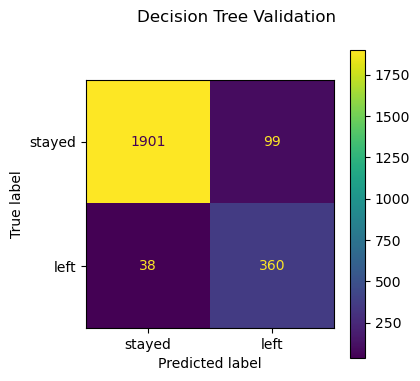

In [74]:
plot_confusion_matrix(y_val, dtree_val_pred, chart_title='Decision Tree Validation')

It is expected that the model predicted more true negatives than true posiitives since there is class imbalance, with more data on employees who stayed. The resulting model predicted more false positives than false negatives, as confirmed by the lower precision score compared to recall score. Overall, the model performed very well on validation data.

#### Random Forest

Get predicitons on validation data.

In [75]:
rf_val_pred = rf_cv.predict(x_val)

Get performance metrics.

In [76]:
rf_val_results = get_test_scores('Random Forest Validation', y_val, rf_val_pred)
rf_val_results

model  accuracy  precision    recall        f1   roc_auc
0  Random Forest Validation  0.966222   0.913838  0.879397  0.896287  0.931448

Plot confusion matrix.

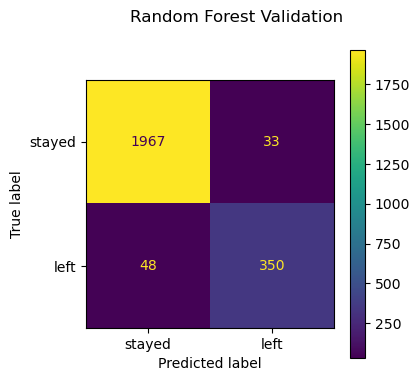

In [77]:
plot_confusion_matrix(y_val, rf_val_pred, chart_title='Random Forest Validation')

The model predicted more false negatives than false posiitves, as supported by the lower recall score compared to precision score. Overll, this model performeed very well on validation data.

#### XGBoost

Get predicitons on validation data.

In [78]:
xgb_val_pred = xgb_cv.predict(x_val)

Get performance metrics.

In [79]:
xgb_val_results = get_test_scores('XGBoost Validation', y_val, xgb_val_pred)
xgb_val_results

model  accuracy  precision    recall        f1   roc_auc
0  XGBoost Validation  0.966222   0.899244  0.896985  0.898113  0.938492

Plot confusion matrix.

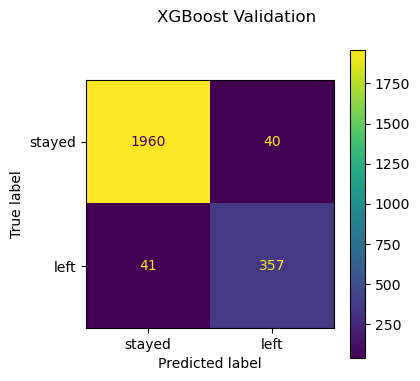

In [80]:
plot_confusion_matrix(y_val, xgb_val_pred, chart_title='XGBoost Validation')

The XGBoost model predicted an almost equal number of false negatives and false positives, resulting in similar precision, recall, and F1 scores.

Compile all results into one DataFrame for side-by-side comparison.

In [81]:
val_results = pd.concat([dtree_val_results, rf_val_results, xgb_val_results], axis=0)
val_results

model  accuracy  precision    recall        f1   roc_auc
0  Decision Tree Validation  0.942869   0.784314  0.904523  0.840140  0.927511
0  Random Forest Validation  0.966222   0.913838  0.879397  0.896287  0.931448
0        XGBoost Validation  0.966222   0.899244  0.896985  0.898113  0.938492

The decision tree performed the worst on all metrics except recall, where random forest scored the lowest. The XGBoost and random forest model performed similarly with equal accuracy scores. The random forest model tends to predict more false negatives as reflected by the slightly worse recall score but is less likely to make false positive predictions as reflected by the higher precision score. On the other hand, the XGBoost model has almost equal precision and recall scores, suggesting that it is a more balanced model. Together with its slightly higher ROC AUC score, the XGBoost model is chosen as the champion model.

It should be notes, that the XGBoost model have lower ROC AUC score on validation data compared to cross-validated training data, suggesting potential overfitting of the constructed models to the training data; nevertheless, an ROC AUC score of 0.938 is excellent. It is safe to proceed with evluation on test data to simulate real-world performance.


### Results
Evaluate the champion model on test data to simulate real-world performance.

In [82]:
xgb_test_pred = xgb_cv.predict(x_test)

Get performance scores.

In [83]:
xgb_test_results = get_test_scores('XGBoost Test', y_test, xgb_test_pred)
xgb_test_results

model  accuracy  precision   recall        f1  roc_auc
0  XGBoost Test   0.96707   0.899749  0.90201  0.900878  0.94101

Plot the confusion matrix.

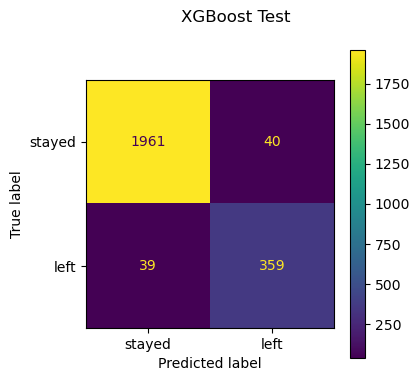

In [84]:
plot_confusion_matrix(y_test, xgb_test_pred, chart_title='XGBoost Test')

Compile test and validation results into one DataFrame for side-by-side comparison.

In [85]:
results = pd.concat([val_results, xgb_test_results], axis=0)
results

model  accuracy  precision    recall        f1   roc_auc
0  Decision Tree Validation  0.942869   0.784314  0.904523  0.840140  0.927511
0  Random Forest Validation  0.966222   0.913838  0.879397  0.896287  0.931448
0        XGBoost Validation  0.966222   0.899244  0.896985  0.898113  0.938492
0              XGBoost Test  0.967070   0.899749  0.902010  0.900878  0.941010

As expected, the XGBoost model had similar precision and recall scores as seen in model validation. The model has slightly better scores across all performance metrics, suggesting that the model does not overfit to the validation data.

Create function to plot feature importances of the model.

In [215]:
def plot_top_feature_importances(model_object, top_n: int, chart_title: str):
    """
    This function creates a bar plot of the top_n features of model_object with the highest feature importances.
    """
    # Get best estimator.
    best_estimator = model_object.best_estimator_
    # Store feature names and their importance values in a DataFrame.
    df_importances = pd.DataFrame({'feature': best_estimator.feature_names_in_, 
                                   'importance': best_estimator.feature_importances_
                                  }
                                 )
    # Get top 10 feature importances.
    top_features = df_importances.sort_values('importance', ascending=False).head(n)
    # Create bar plot of feature importances
    plt.figure(figsize=(8, 6))
    sns.barplot(top_features, x='importance', y='feature', hue='feature', palette='crest', orient='h')
    plt.title(chart_title)
    plt.show()

Plot feature importance of the champion model.

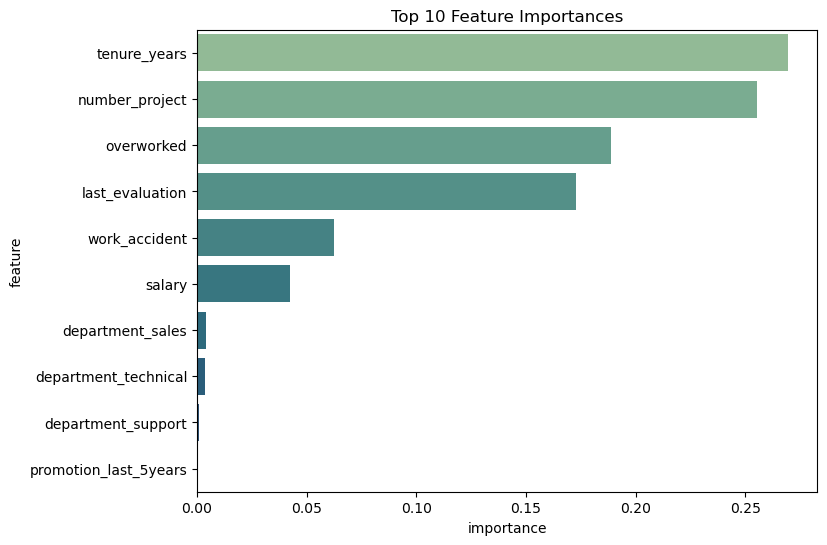

In [87]:
n = 10
plot_top_feature_importances(xgb_cv, n, f'Top {n} Feature Importances')

`tenure_years` has the highest importance, which can be explained by presence of outliers in `tenure_years`. The importance of this feature may possibly be influenced by outliers, where none of the long-tenured (`tenure_years` >= 7) employees left the company. 

The next two most important features are related to workload - `number_project` and `overworked`. This confirms that overworking is one of the main factors that drive employee turnover.

The fourth most important feature is `last_evaluation`. Earlier EDA showed some positive correlation between `average_number_hours` and `last_evaluation`, suggesting employees that woprk longer hours tend to have higher evaluation scores.

As expected, `department` has little importance in teh prediction model. This supports the result from the hypothesis testing that differences in the observed turnover rates among departments are not statistically significant.

## Conclusion
<a id='conclusion'></a>

Insights from exploratory data analysis and feature importances of the machine learning model confirm that employees are overworked. Woking long hours and contributing to several projects without receiving promotion is a characteristic of poor work culture. 

The following actions are recommended to help improve employee retention.
1. Limit the number of projects that employees need to work on.
2. Review policies regarding overtime work. Do not require employees to work overtime or give adequate compensation for overtime work.
3. Consider promoting employees with very high evaluation scores.
4. Review evaluation criteria for employees. In particular, revise evaluation rubrics so that evaluation scores are not largely influenced by working hours.
5. Conduct further investigation into why four-year tenured employees who left tend to have very low satisfaction evels.


## Appendix
<a id='appendix'></a>

### Charts for publication

In [204]:
# Import Plotly for creating charts for publication.
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots

In [230]:
def add_normal_monthly_hours(fig):
    """
    This function adds a vertical reference line for the normal monthly working hours of a regular full-time employee.
    """
    fig.add_vline(x=normal_monthly_hours, 
                  annotation_text='Normal Monthly Hours = 166.7',
                  annotation_font_size=16,
                  annotation_font_color='red',
                  line_width=3, 
                  line_dash="dash", 
                  line_color="red"
                 )

Create scatter plot of `satisfaction_level` by `average_monthly_hours`.

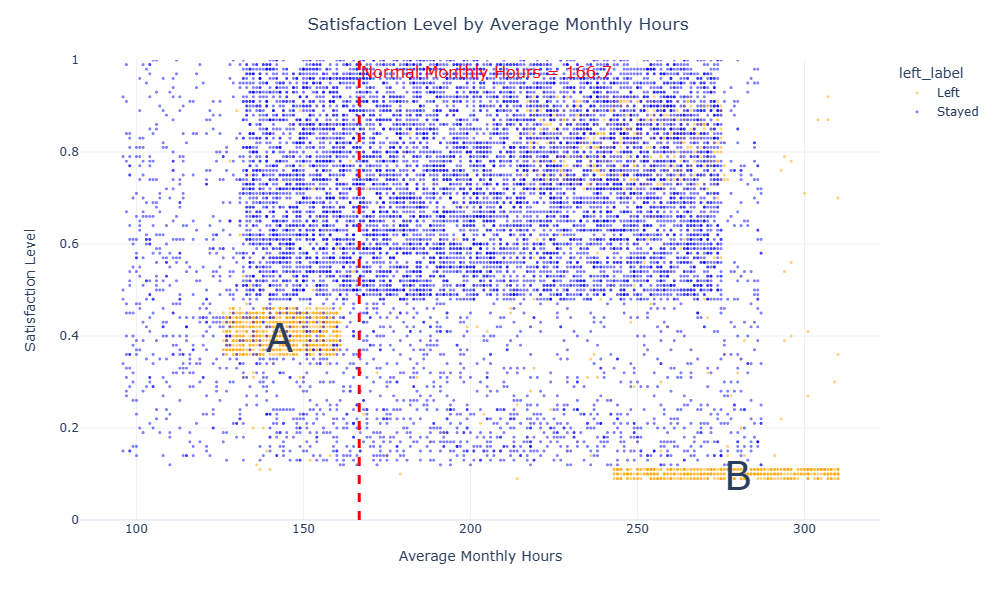

In [231]:
fig = px.scatter(df_clean, 
                 x='average_monthly_hours',
                 y='satisfaction_level', 
                 color='left_label', 
                 color_discrete_map={'Stayed': 'blue', 'Left': 'orange'}
                )

fig.update_traces(marker={'size': 3, 'opacity': 0.5})

add_normal_monthly_hours(fig)

fig.add_annotation(text='A', font_size=40, xref='x', yref='y', x=143, y=0.4, showarrow=False)
fig.add_annotation(text='B', font_size=40, xref='x', yref='y', x=280, y=0.1, showarrow=False)

fig.update_layout(title='Satisfaction Level by Average Monthly Hours',
                  title_x=0.5,
                  xaxis=dict(title='Average Monthly Hours'),
                  yaxis=dict(title='Satisfaction Level', range=[0, 1.0]),
                  template='plotly_white', 
                  height=600, 
                  width=800
                 )
fig.show()

Create a scatter plot of `last_evaluation` by `average_monthly_hours`.

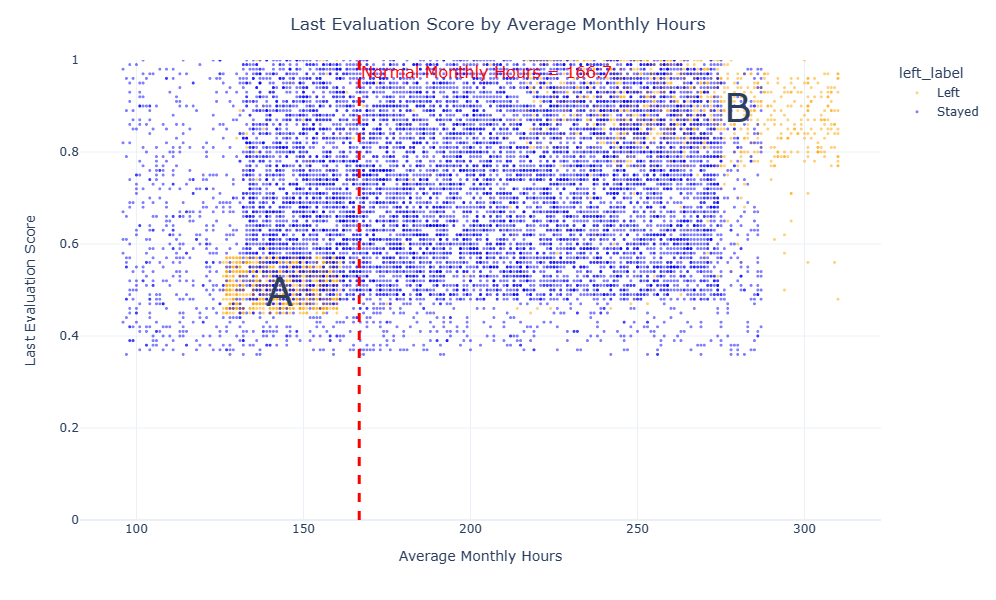

In [232]:
fig = px.scatter(df_clean, 
                 x='average_monthly_hours',
                 y='last_evaluation', 
                 color='left_label', 
                 color_discrete_map={'Stayed': 'blue', 'Left': 'orange'}
                )

fig.update_traces(marker={'size': 3, 'opacity': 0.5})

add_normal_monthly_hours(fig)

fig.add_annotation(text='A', font_size=40, xref='x', yref='y', x=143, y=0.5, showarrow=False)
fig.add_annotation(text='B', font_size=40, xref='x', yref='y', x=280, y=0.9, showarrow=False)

fig.update_layout(title='Last Evaluation Score by Average Monthly Hours',
                  title_x=0.5,
                  xaxis=dict(title='Average Monthly Hours'),
                  yaxis=dict(title='Last Evaluation Score', range=[0, 1.0]),
                  template='plotly_white', 
                  height=600, 
                  width=800
                 )
fig.show()

Create bar chart of median `avergae_monthly_hours` by `number_project`.

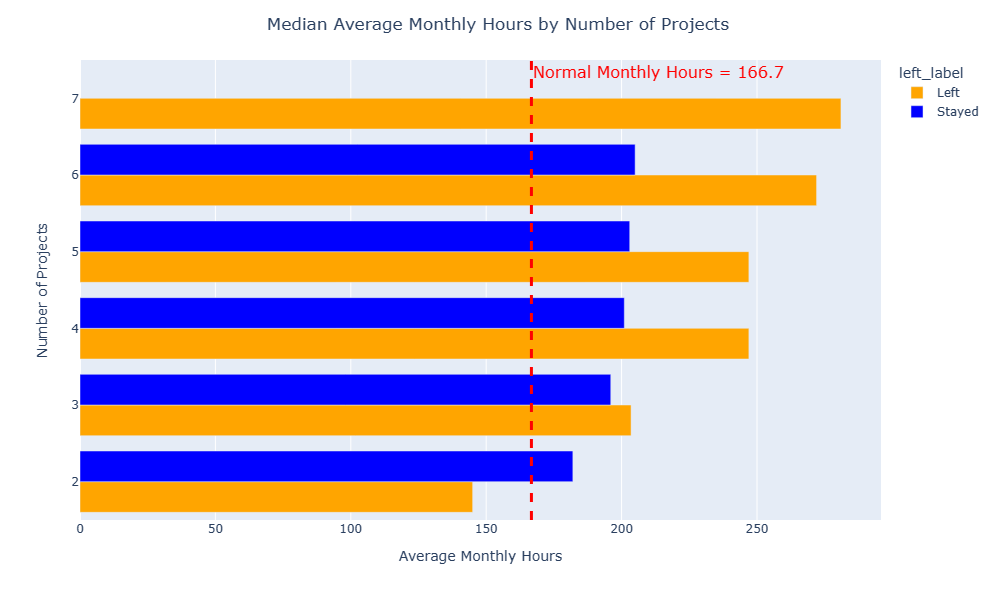

In [233]:
median_hours_by_project = df_clean.groupby(['left_label', 'number_project'])['average_monthly_hours'].median().reset_index()

fig = px.bar(median_hours_by_project, 
             x='average_monthly_hours', 
             y='number_project', 
             color='left_label', 
             color_discrete_map={'Stayed': 'blue', 'Left': 'orange'},
             barmode='group',
             orientation='h'
            )

add_normal_monthly_hours(fig)

fig.update_layout(title='Median Average Monthly Hours by Number of Projects',
                  title_x=0.5,
                  xaxis=dict(title='Average Monthly Hours'),
                  yaxis=dict(title='Number of Projects'),
                  height=600, 
                  width=800
                 )

fig.show()

Create bar chart of median `satisfaction_level` by `tenure_years`.

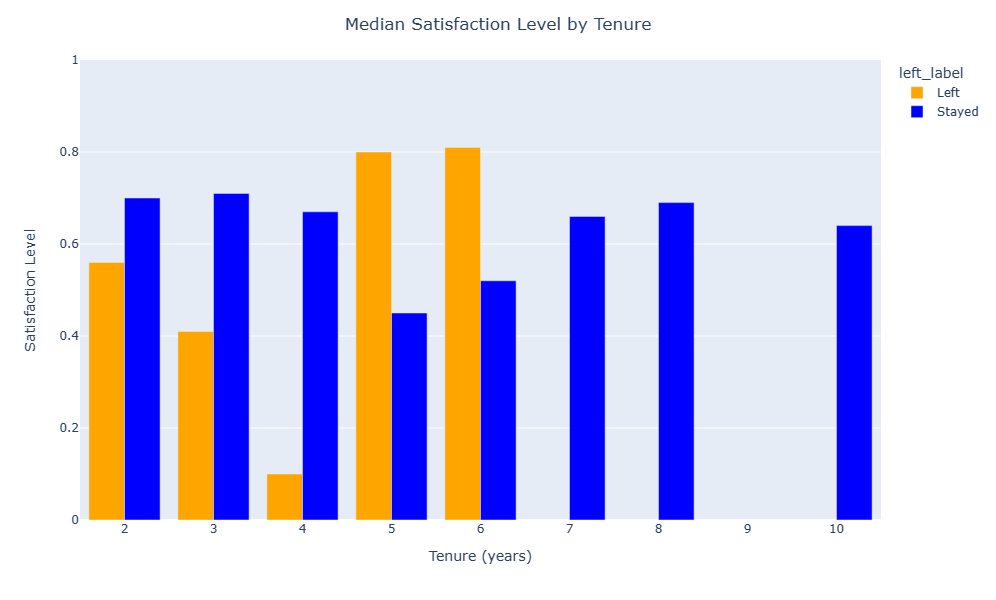

In [234]:
satisfaction_by_tenure = df_clean.groupby(['left_label', 'tenure_years'])['satisfaction_level'].median().reset_index()

fig = px.bar(satisfaction_by_tenure, 
             x='tenure_years', 
             y='satisfaction_level', 
             color='left_label', 
             color_discrete_map={'Stayed': 'blue', 'Left': 'orange'},
             barmode='group'
            )

fig.update_layout(title='Median Satisfaction Level by Tenure',
                  title_x=0.5,
                  xaxis=dict(title='Tenure (years)', tickvals=list(range(2, 11)), ticktext=list(range(2, 11))),
                  yaxis=dict(title='Satisfaction Level', range=[0, 1.0]),
                  height=600, 
                  width=800
                 )

fig.show()

Create feature importance bar chart.

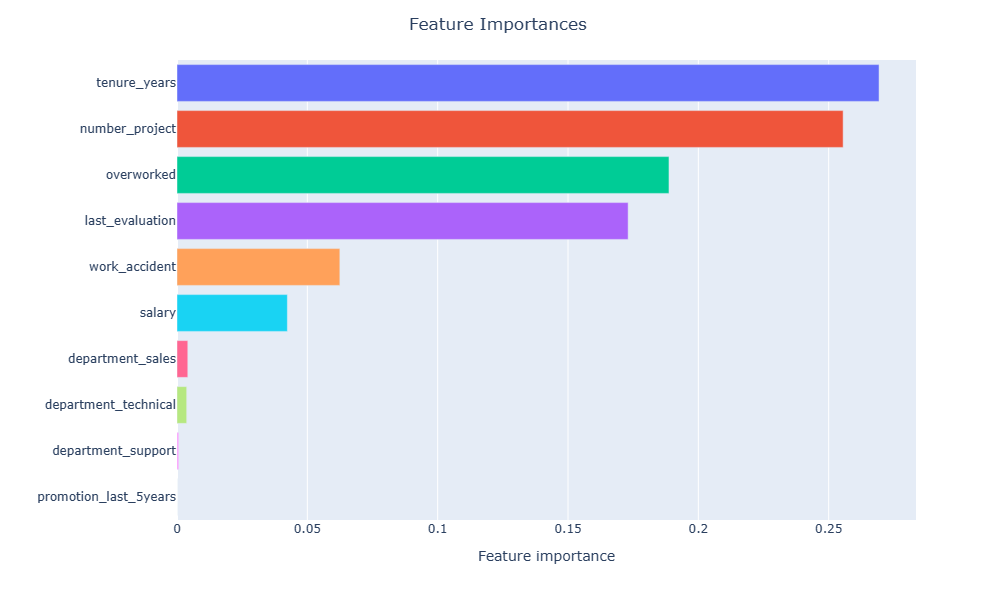

In [236]:
# Get best estimator.
best_estimator = xgb_cv.best_estimator_
# Store feature names and their importance values in a DataFrame.
df_importances = pd.DataFrame({'feature': best_estimator.feature_names_in_, 
                                'importance': best_estimator.feature_importances_
                              }
                             )
# Sort by importance and get top 10 features.
top_features = df_importances.sort_values('importance', ascending=False).head(10)

fig = px.bar(top_features, x='importance', y='feature', color='feature', orientation='h')

fig.update_layout(title='Feature Importances',
                  title_x=0.5,
                  xaxis=dict(title='Feature importance'),
                  yaxis=dict(title=''),
                  height=600, 
                  width=800,
                  showlegend=False
                 )

fig.show()